<a href="https://colab.research.google.com/github/ZikGitHub/python-colab/blob/main/Math_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Distribution Curve

### Random Experiment when a die flipped over 10,000 times

In [ ]:
import pandas as pd
import numpy as np
import random

L = []

for i in range(10000):
  a = random.randint(1,6)
  L.append(a)

print(f"The length of L is: {len(L)}")
print(f"First five elements of L are: {L[:5]}")
print(f"Unique elements in L are: {list(set(L))}")

The length of L is: 10000
First five elements of L are: [4, 2, 6, 2, 4]
Unique elements in L are: [1, 2, 3, 4, 5, 6]


In [ ]:
# Create Series from above and calculate probability of each face appeared

s = (pd.Series(L).value_counts() / len(L)).sort_index()
s

,count
1,0.1696
2,0.1737
3,0.1664
4,0.1554
5,0.1684
6,0.1665


In [ ]:
# Cumulative sum
np.cumsum(s)

,count
1,0.1696
2,0.3433
3,0.5097
4,0.6651
5,0.8335
6,1.0000


<Axes: >

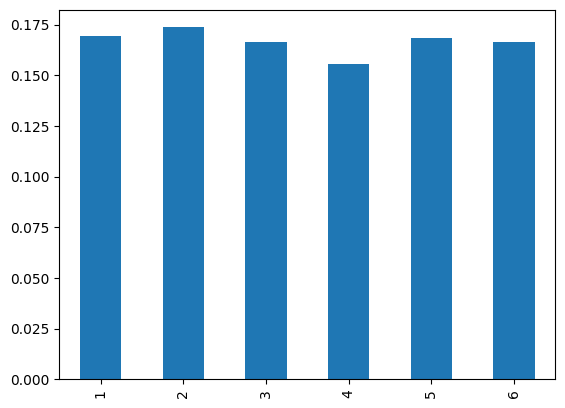

In [ ]:
# plot
s.plot(kind='bar')

<Axes: >

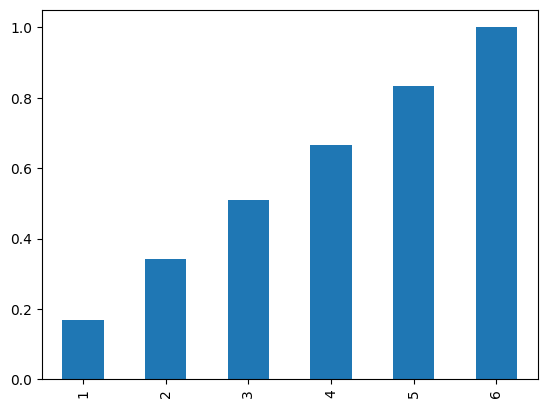

In [ ]:
np.cumsum(s).plot(kind='bar')

### Random Experiment whe 2 dies are flipped for 10,000 times

In [ ]:
import pandas as pd
import numpy as np
import random

L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)
  L.append(a+b)

print(f"The length of L is: {len(L)}")
print(f"Unique elements in L are: {list(set(L))}")
print(f"The first 10 elements in L are: {L[:10]}")


The length of L is: 10000
Unique elements in L are: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
The first 10 elements in L are: [9, 11, 4, 8, 10, 11, 3, 6, 11, 9]


In [ ]:
# create Series from above and calculate probablities

s = (pd.Series(L).value_counts()/len(L)).sort_index()
s

,count
2,0.0272
3,0.0546
4,0.0845
5,0.1084
6,0.1340
7,0.1632
8,0.1404
9,0.1144
10,0.0875
11,0.0580


In [ ]:
# cumulative sum
np.cumsum(s)

,count
2,0.0272
3,0.0818
4,0.1663
5,0.2747
6,0.4087
7,0.5719
8,0.7123
9,0.8267
10,0.9142
11,0.9722


<Axes: >

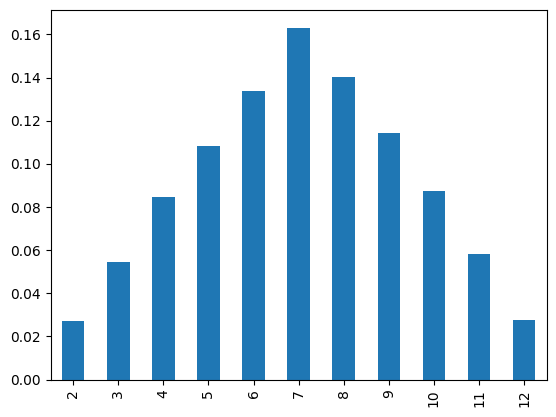

In [ ]:
# plot the graph
s.plot(kind='bar')

<Axes: >

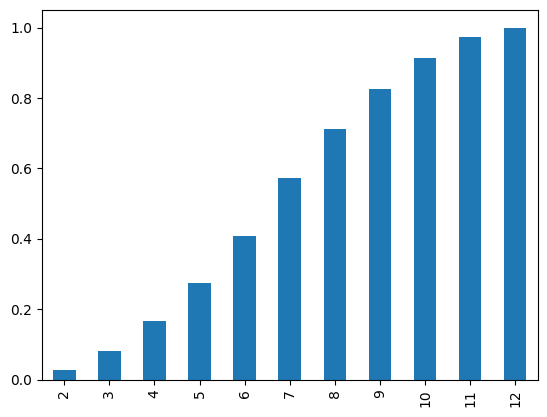

In [ ]:
# cumulative graph
np.cumsum(s).plot(kind='bar')

### Parametric Density Estimation

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5, size=1000)
sample[:5]

array([47.01127356, 54.26159503, 47.6884301 , 45.45454678, 46.93526781])

In [6]:
sample.mean()

np.float64(49.9638013018484)

(array([  2.,  19.,  48., 130., 221., 238., 209.,  91.,  34.,   8.]),
 array([32.992626  , 36.19810634, 39.40358667, 42.60906701, 45.81454734,
        49.02002768, 52.22550801, 55.43098835, 58.63646868, 61.84194902,
        65.04742935]),
 <BarContainer object of 10 artists>)

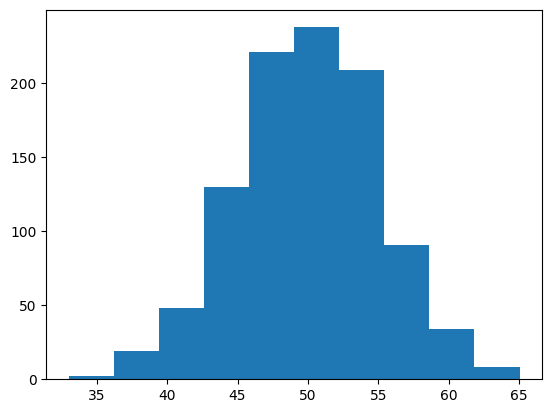

In [7]:
# plot Histogram to understand distribution of datta
plt.hist(sample, bins=10)